<class 'pandas.core.series.Series'>
Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: Daily total female births in California, 1959, dtype: int64
Date
1959-12-22    39
1959-12-23    40
1959-12-24    38
1959-12-25    44
1959-12-26    34
1959-12-27    37
1959-12-28    52
1959-12-29    48
1959-12-30    55
1959-12-31    50
Name: Daily total female births in California, 1959, dtype: int64
365
Date
1959-11-01    48
1959-11-02    49
1959-11-03    43
1959-11-04    42
1959-11-05    59
1959-11-06    45
1959-11-07    52
1959-11-08    46
1959-11-09    42
1959-11-10    40
1959-11-11    40
1959-11-12    45
1959-11-13    35
1959-11-14    35
1959-11-15    40
1959-11-16    39
1959-11-17    33
1959-11-18    42
1959-11-19    47
1959-11-20    51
1959-11-21    44
1959-11-22    40
1959-11-23    57
1959-11-24    49
1959-11-25    45
1959-11-26    49
1959-11-27    51
1959-11-28    46
1959-11-29    44
1959-11-30    52
Name: Daily total female births in California, 1

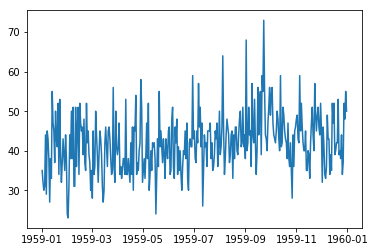

In [6]:
# Load and Explore series data.
from pandas import Series

# load data
series = Series.from_csv('daily-total-female-births-in-cal.csv', header=0)

print(type(series))
print(series.head())
print(series.tail(10))

print(series.size)

print(series['1959-11'])

print(series.describe())

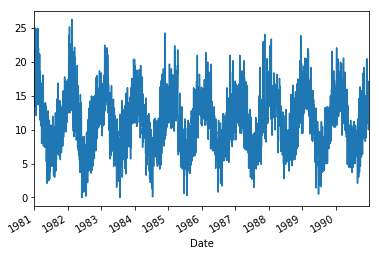

In [3]:
# Visualization Time Series
from pandas import Series
from matplotlib import pyplot as plt

series = Series.from_csv('daily-minimum-temperatures-in-me.csv', header=0)
# Line plot
series.plot()
plt.show()

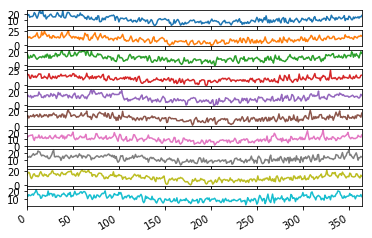

In [7]:
from pandas import Series
from pandas import DataFrame
from pandas import TimeGrouper
from matplotlib import pyplot as plt

series = Series.from_csv('daily-minimum-temperatures-in-me.csv', header=0)
groups = series.groupby(TimeGrouper('A'))
years = DataFrame()
for name, group in groups:
    years[name.value] = group.values
years.plot(subplots=True, legend=False)
plt.show()

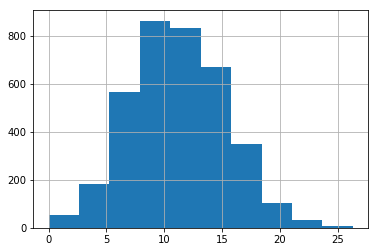

In [12]:
from pandas import Series
from matplotlib import pyplot as plt

series = Series.from_csv('daily-minimum-temperatures-in-me.csv', header=0)
series.hist()
plt.show()

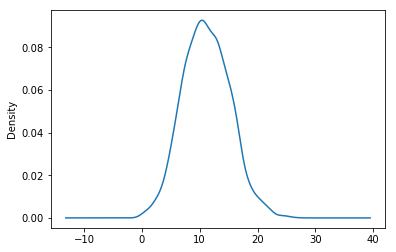

In [11]:
from pandas import Series
from matplotlib import pyplot as plt

series = Series.from_csv('daily-minimum-temperatures-in-me.csv', header=0)
series.plot(kind='kde')  # kde: Kernel Density Estimation plot
plt.show()

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
1901-06-01    168.5
1901-07-01    231.8
1901-08-01    224.5
1901-09-01    192.8
1901-10-01    122.9
1901-11-01    336.5
1901-12-01    185.9
1902-01-01    194.3
1902-02-01    149.5
1902-03-01    210.1
1902-04-01    273.3
1902-05-01    191.4
1902-06-01    287.0
1902-07-01    226.0
1902-08-01    303.6
1902-09-01    289.9
1902-10-01    421.6
1902-11-01    264.5
1902-12-01    342.3
1903-01-01    339.7
1903-02-01    440.4
1903-03-01    315.9
1903-04-01    439.3
1903-05-01    401.3
1903-06-01    437.4
1903-07-01    575.5
1903-08-01    407.6
1903-09-01    682.0
1903-10-01    475.3
1903-11-01    581.3
1903-12-01    646.9
Name: Sales of shampoo over a three year period, dtype: float64


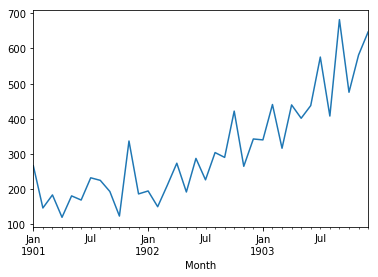

In [1]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot as plt

def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('sales-of-shampoo-over-a-three-ye.csv', header=0,parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series)
series.plot()
plt.show()

     t-1    t+1
0    NaN  266.0
1  266.0  145.9
2  145.9  183.1
3  183.1  119.3
4  119.3  180.3
Test MSE: 17730.518


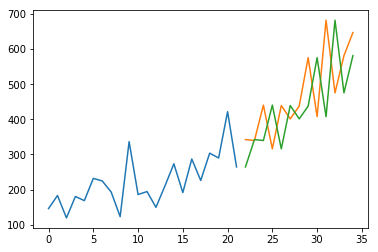

In [16]:
# Persistence Forecast Model
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error

def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('sales-of-shampoo-over-a-three-ye.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
# Create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
print(dataframe.head(5))

# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

# persistence model
def model_persistence(x):
	return x

# walk-forward validation
predictions = list()
for x in test_X:
	yhat = model_persistence(x)
	predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)

# plot predictions and expected results
pyplot.plot(train_y)
pyplot.plot([None for i in train_y] + [x for x in test_y])
pyplot.plot([None for i in train_y] + [x for x in predictions])
pyplot.show()